# Import modules

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import os, numpy, torch
import numpy as np
from tqdm import trange
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)

# Collect/Create Data

In [ ]:
sides = []
areas = []

for i in (t := trange(1000)):
    samp = np.random.randint(0, 50)
    squared = samp*samp
    sides.append([samp])
    areas.append([squared])

100%|██████████| 1000/1000 [00:00<00:00, 52418.32it/s]


# Prep Data

In [ ]:
# Split Data
split_ratio = 0.8
split_index = int(len(sides) * split_ratio)

# Convert the data to PyTorch tensors
X = torch.tensor(sides, dtype=torch.float32).view(-1, 1)
Y = torch.tensor(areas, dtype=torch.float32).view(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create Model

In [ ]:
class Net(torch.nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.l1 = nn.Linear(1, 1, bias=False)

  def forward(self, x):
    x = F.relu(self.l1(x))
    return x

# Train Model

In [ ]:
model = Net()

BS = 100
epochs = 1000
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=0.001)

train_losses = []
test_losses = []

num_epochs = 1000
for epoch in range(num_epochs):
    predictions = model(X_train)

    loss = criterion(predictions, Y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    if (epoch + 1) % 50 == 0:
        with torch.no_grad():
            test_predictions = model(X_test)
            test_loss = criterion(test_predictions, Y_test)
            test_losses.append(test_loss.item())

print(f'Test Loss: {test_losses[-1]:.4f}')

Epoch [100/1000], Loss: 1113020.0000
Epoch [200/1000], Loss: 1113020.0000
Epoch [300/1000], Loss: 1113020.0000
Epoch [400/1000], Loss: 1113020.0000
Epoch [500/1000], Loss: 1113020.0000
Epoch [600/1000], Loss: 1113020.0000
Epoch [700/1000], Loss: 1113020.0000
Epoch [800/1000], Loss: 1113020.0000
Epoch [900/1000], Loss: 1113020.0000
Epoch [1000/1000], Loss: 1113020.0000
Test Loss: 1429472.0000


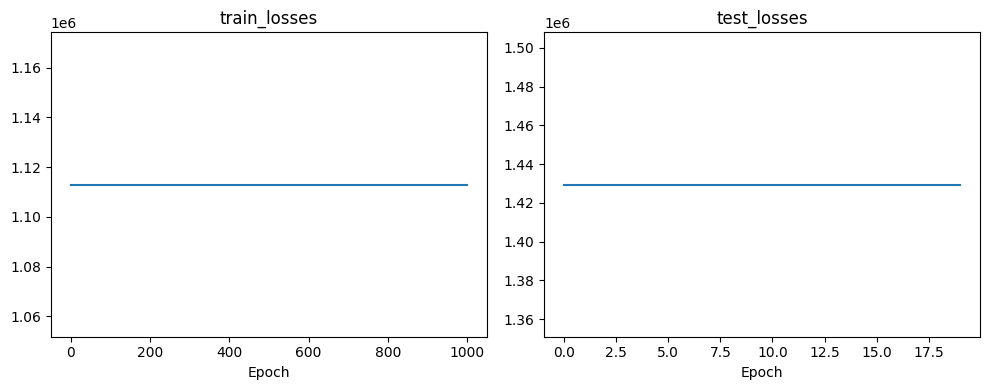

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title("train_losses")
plt.xlabel("Epoch")

plt.subplot(1, 2, 2)
plt.plot(test_losses)
plt.title("test_losses")
plt.xlabel("Epoch")

plt.tight_layout()
plt.show()

# Analyze Model

In [ ]:
# Evaluate the model on the test set
with torch.no_grad():
    test_predictions = model(X_test)
    test_loss = criterion(test_predictions, Y_test)

print(f'Test Loss: {test_loss.item():.4f}')


Test Loss: 1429472.0000
